<a href="https://colab.research.google.com/github/miilaanaa/2022-2-level-ctlr/blob/main/mental_disorders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description of the dataset

- title: Заголовок записи (строка).

- selftext: Содержимое записи (строка).

- created_utc: Время публикации записи (целочисленный формат UTC).
- over_18: Будет ли у публикации >18 или нет. (для номинальных значений NSFW может быть указано >18 записей).
- subreddit: Подредакторы - это дополнительные темы или категории на веб-сайте Reddit. Они позволяют пользователям сосредоточиться на конкретном интересе или теме, публикуя контент, за который проголосовали "за" или "против" в зависимости от релевантности и предпочтений пользователей.(Может использоваться в качестве строки - метки класса).

Набор данных содержит 5 столбцов и около 700 тысяч строк текстовых данных из разных подредактов.

**Актуальность/ цель** - идентифицировать различные виды психических расстройств с помощью текста, чтобы подчеркнуть безопасность пациентов. За последние годы было зафиксировано несколько случаев утечки конфиденциальной медицинской информации, которая может поставить под угрозу безопасность пациентов. Таким образом, обучение модели на основе этого набора данных может помочь пациентам самостоятельно проводить диагностику. На данный момент в Интернете существует множество тестов на депрессию, которые выявляются только с помощью анкеты. Таким образом, это может стать одним из первых подходов к решению проблем психического здоровья, основанных на ИИ.

Ограничения:
- часть данных была удалена из-за атрибута selftext (вероятно, первоначальным автором или, возможно, из-за полученных сообщений).

- в некоторых публикациях не так много описательного контекста как для заголовка

- в наборе данных есть поля с "троллинговыми" постами, которые только помешают процессу обучения модели. Пост тролля может выглядеть примерно так ("Я В ВАШИХ СТЕНАХ/ПОЛОВИЦАХ/ПОТОЛКАХ/и т.д.). Цель этих постов тролля пока неизвестна. Таким образом, необходима интенсивная предварительная обработка, чтобы гарантировать, что в модель будут поступать только высококачественные данные.

# Uploading a dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install opendatasets

In [ ]:
{"username":"milanana","key":"8bb737de0c37e60a567fe9389854ce25"}

In [4]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/kamaruladha/mental-disorders-identification-reddit-nlp")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: milanana
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kamaruladha/mental-disorders-identification-reddit-nlp


100%|██████████| 208M/208M [00:07<00:00, 28.2MB/s]


In [5]:
df = pd.read_csv('/content/mental-disorders-identification-reddit-nlp/mental_disorders_reddit.csv')

In [6]:
df.head(7)

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD
5,My ex got diagnosed with BPD,"Without going into detail, this diagnosis expl...",1650350635,False,BPD
6,Is misdiagnosis of BPD common? I am asking bec...,(Reposting here on the larger sub on recommend...,1650349446,False,BPD


# Data - cleaning

In [7]:
df.shape

(701787, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701787 entries, 0 to 701786
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        701741 non-null  object
 1   selftext     668096 non-null  object
 2   created_utc  701787 non-null  int64 
 3   over_18      701787 non-null  bool  
 4   subreddit    701787 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 22.1+ MB


In [9]:
df.isnull().any()

title           True
selftext        True
created_utc    False
over_18        False
subreddit      False
dtype: bool

In [10]:
df.isnull().sum()

title             46
selftext       33691
created_utc        0
over_18            0
subreddit          0
dtype: int64

In [11]:
df=df.dropna(how='any')

In [12]:
df.isnull().sum()

title          0
selftext       0
created_utc    0
over_18        0
subreddit      0
dtype: int64

In [13]:
df = df.loc[df['subreddit'] != 'mentalillness']
df['subreddit'].value_counts()


subreddit
BPD              233119
Anxiety          167032
depression       156708
bipolar           46666
schizophrenia     20280
Name: count, dtype: int64

In [14]:
# Check if 'selftext' is in the columns
if 'selftext' in df.columns:
    # Drop rows where 'selftext' is '[removed]' or '\[removed\]'
    df.drop(df[(df['selftext'] =='\\[removed\\]')].index, inplace=True)
    df.drop(df[(df['selftext'] =='[removed]')].index, inplace=True)

In [15]:
df.head(7)

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
5,My ex got diagnosed with BPD,"Without going into detail, this diagnosis expl...",1650350635,False,BPD
6,Is misdiagnosis of BPD common? I am asking bec...,(Reposting here on the larger sub on recommend...,1650349446,False,BPD
7,I have trouble identifying my sexual orientati...,I grew up mostly dating men but realized when ...,1650349125,False,BPD


In [16]:
import re

# Функция для удаления небуквенных символов и символов переноса строки из строки
def remove_non_alpha_and_newlines(text):
    # Удаляем небуквенные символы и символы переноса строки
    return re.sub(r'[^a-zA-Z\s]', '', text).replace('\n', ' ')

# Применение функции ко всем строкам в колонке "selftext"
df['selftext_clean'] = df['selftext'].apply(lambda x: remove_non_alpha_and_newlines(str(x)))

# Вывод первых 5 строк для проверки
print(df[['selftext', 'selftext_clean']].head())

                                            selftext  \
0  Does anyone else think the most important part...   
1  Hello fellow friends 😄\n\nI'm on the BPD spect...   
2  My [F20] bf [M20] told me today (after I said ...   
3  Okay, I’m about to open up about many things I...   
5  Without going into detail, this diagnosis expl...   

                                      selftext_clean  
0  Does anyone else think the most important part...  
1  Hello fellow friends   Im on the BPD spectrum ...  
2  My F bf M told me today after I said I just wi...  
3  Okay Im about to open up about many things Ive...  
5  Without going into detail this diagnosis expla...  


In [17]:
df.head()

,title,selftext,created_utc,over_18,subreddit,selftext_clean
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD,Does anyone else think the most important part...
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD,Hello fellow friends Im on the BPD spectrum ...
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD,My F bf M told me today after I said I just wi...
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD,Okay Im about to open up about many things Ive...
5,My ex got diagnosed with BPD,"Without going into detail, this diagnosis expl...",1650350635,False,BPD,Without going into detail this diagnosis expla...


In [18]:
# Функция для проверки, написаны ли все слова капслоком
def is_all_caps(text):
    # Проверяем, все ли слова в строке написаны капслоком
    return all(word.isupper() for word in text.split())

# Применение функции ко всем строкам в колонке "selftext_clean"
df['all_caps'] = df['selftext_clean'].apply(lambda x: is_all_caps(str(x)))

# Вывод первых 5 строк для проверки
df[['selftext_clean', 'all_caps']].head()

,selftext_clean,all_caps
0,Does anyone else think the most important part...,False
1,Hello fellow friends Im on the BPD spectrum ...,False
2,My F bf M told me today after I said I just wi...,False
3,Okay Im about to open up about many things Ive...,False
5,Without going into detail this diagnosis expla...,False


In [19]:
df['all_caps'].value_counts()

all_caps
False    542341
True        714
Name: count, dtype: int64

In [20]:
# Фильтрация строк, где все слова написаны капслоком
subdet = df[df['all_caps'] == True]

# Вывод первых 5 строк для проверки
subdet[['selftext_clean', 'all_caps']].head()

,selftext_clean,all_caps
11808,DEHUMANIZED HEY YOU IM SPEAKING TO YOU IM N...,True
14469,AHHG FK ME ITS NOT FAIR WHY CANT I CONTROL HOW...,True
15337,I NEED TO DIE I NEED TO DIE I NEED TO DIE I NE...,True
24795,NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,True
34946,FUCCCCCCCKKKKKKKKKKKKKKKKKKKKKKKK FUCCCCCCCKKK...,True


In [21]:
# Фильтрация строк, где все слова написаны капслоком
clean_data = df[df['all_caps'] == False]

# Вывод первых 5 строк для проверки
clean_data[['selftext_clean', 'all_caps']].sample(n=5)

,selftext_clean,all_caps
267112,I feel fantastic I had actual protein I ate so...,False
420913,There are billions of people in this earth but...,False
307296,Listening to sad Joji music and thinking about...,False
275330,Ran out of Seroquel and my doctor refuses to f...,False
75345,Im sorry about the flair as im not sure which ...,False


In [22]:
clean_data.drop(clean_data.columns[[1, 2, 6]], axis=1, inplace=True)

<ipython-input-22-ae35cf00d631>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(clean_data.columns[[1, 2, 6]], axis=1, inplace=True)


In [23]:
clean_data.head()

,title,over_18,subreddit,selftext_clean
0,Life is so pointless without others,False,BPD,Does anyone else think the most important part...
1,Cold rage?,False,BPD,Hello fellow friends Im on the BPD spectrum ...
2,I don’t know who I am,False,BPD,My F bf M told me today after I said I just wi...
3,HELP! Opinions! Advice!,False,BPD,Okay Im about to open up about many things Ive...
5,My ex got diagnosed with BPD,False,BPD,Without going into detail this diagnosis expla...


## Preprocessing

## EDA + normalization

In [24]:
! pip install pandas matplotlib

In [25]:
! pip install pandas matplotlib scikit-learn imbalanced-learn

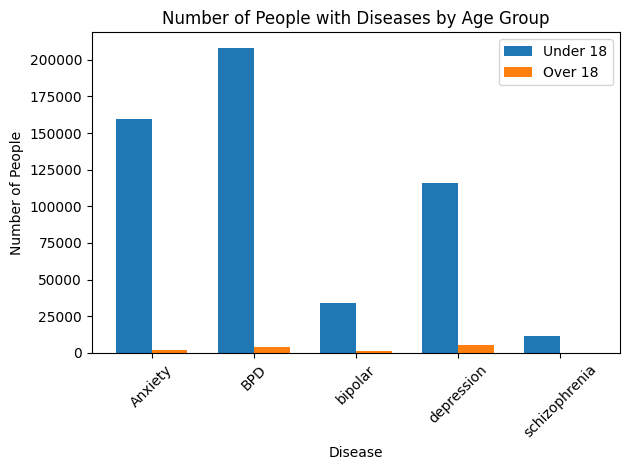

In [27]:
# Создаем сводную таблицу для подсчета количества записей по каждой комбинации 'over_18' и 'subreddit'
pivot_df = clean_data.pivot_table(index='subreddit', columns='over_18', aggfunc='size', fill_value=0)

# Построение столбчатой диаграммы
fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(pivot_df))

bars1 = ax.bar(index, pivot_df[False], bar_width, label='Under 18')
bars2 = ax.bar([i + bar_width for i in index], pivot_df[True], bar_width, label='Over 18')

ax.set_xlabel('Disease')
ax.set_ylabel('Number of People')
ax.set_title('Number of People with Diseases by Age Group')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(pivot_df.index)

ax.legend()

plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости

plt.tight_layout()
plt.show()

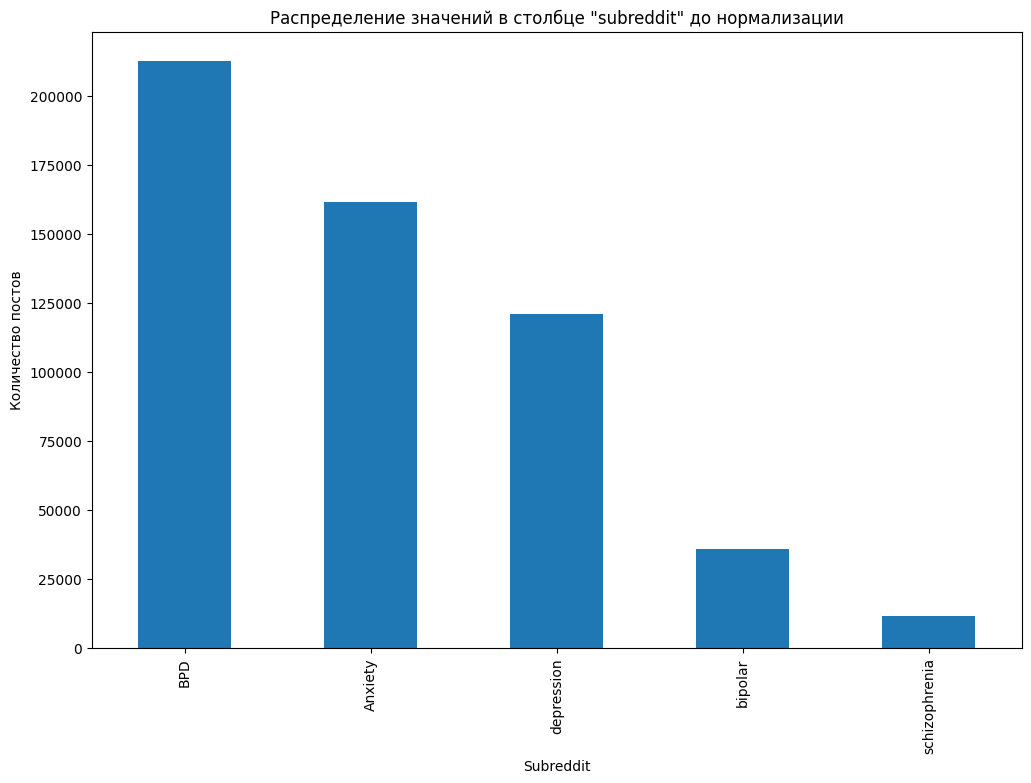

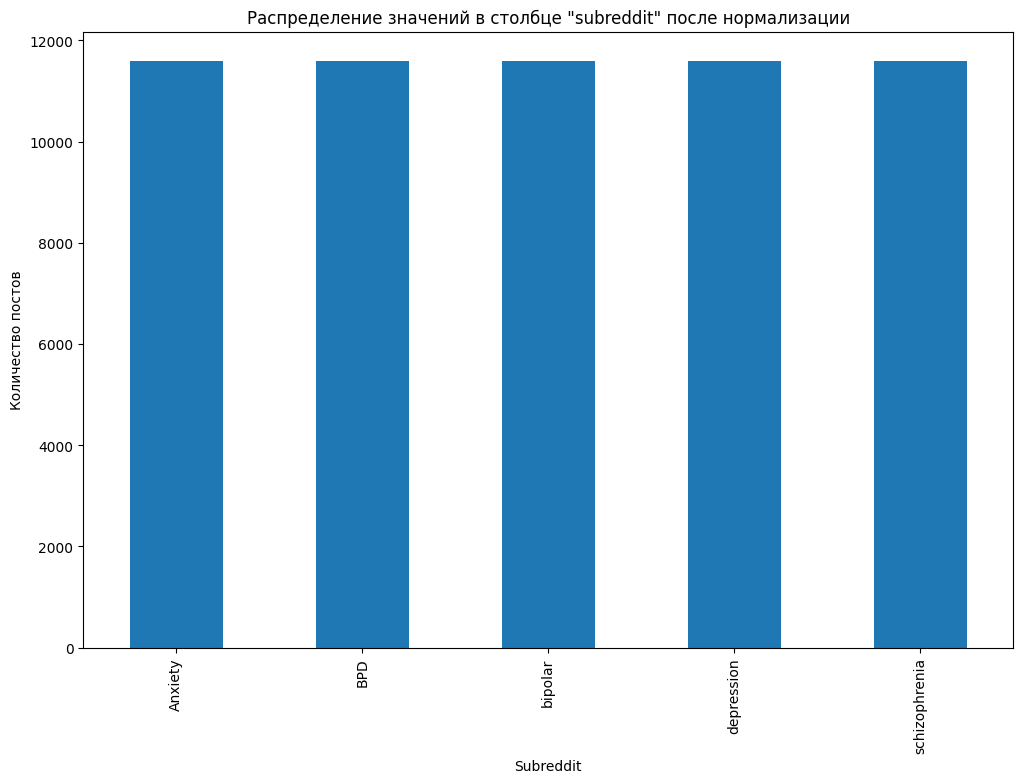

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Подсчет количества значений в столбце "subreddit" до нормализации
subreddit_counts_before = clean_data['subreddit'].value_counts()

# Разделение данных на признаки и метки
X = clean_data.drop(columns=['subreddit'])
y = clean_data['subreddit']

# Применение недо-выборки для нормализации данных
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Объединение нормализованных данных в один DataFrame
normalized_data = X_res.copy()
normalized_data['subreddit'] = y_res

# Подсчет количества значений в столбце "subreddit" после нормализации
subreddit_counts_after = normalized_data['subreddit'].value_counts()

# Построение графика до нормализации
plt.figure(figsize=(12, 8))
subreddit_counts_before.plot(kind='bar')
plt.title('Распределение значений в столбце "subreddit" до нормализации')
plt.xlabel('Subreddit')
plt.ylabel('Количество постов')
plt.xticks(rotation=90)
plt.show()

# Построение графика после нормализации
plt.figure(figsize=(12, 8))
subreddit_counts_after.plot(kind='bar')
plt.title('Распределение значений в столбце "subreddit" после нормализации')
plt.xlabel('Subreddit')
plt.ylabel('Количество постов')
plt.xticks(rotation=90)
plt.show()

In [ ]:
subreddit_counts_after

subreddit
Anxiety          11594
BPD              11594
bipolar          11594
depression       11594
schizophrenia    11594
Name: count, dtype: int64

In [ ]:
normalized_data

,title,over_18,selftext_clean,subreddit
0,Starting New Job (Again),False,I job hop Badly Im practically a jack of all t...,Anxiety
1,DAE feel ants all over their skin when they ar...,False,Like your just sitting there and you feel like...,Anxiety
2,Acid reflux type of feeling,False,Got a really weird acid reflux type feeling at...,Anxiety
3,"Went out to a social gathering earlier, had se...",False,Im in Real Estate as an agent well trying to g...,Anxiety
4,Just prescribed Effexor XR. Terrified to start it,False,I got prescribed this today but Im terrified t...,Anxiety
...,...,...,...,...
57965,Jaw clenching,False,Hey I dont know if this is the place for it Bu...,schizophrenia
57966,Is it safe to take appetite suppressants for w...,False,Does anyone know,schizophrenia
57967,I'm worried I can't tell what side effects I a...,False,Ive been on Invega sustena for just over a yea...,schizophrenia
57968,And the symptoms are back,False,Was getting the skulls and voices again like I...,schizophrenia


## Tokenization


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Токенизация слов в столбце 'selftext_clean'
normalized_data['selftext_clean_tokens'] = normalized_data['selftext_clean'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
normalized_data.head(10)

,title,over_18,selftext_clean,subreddit,selftext_clean_tokens
0,Starting New Job (Again),False,job hop badly m practically jack trade differe...,Anxiety,"[job, hop, badly, m, practically, jack, trade,..."
1,DAE feel ants all over their skin when they ar...,False,like sit feel like s ant walk,Anxiety,"[like, sit, feel, like, s, ant, walk]"
2,Acid reflux type of feeling,False,weird acid reflux type feeling throat stop sle...,Anxiety,"[weird, acid, reflux, type, feeling, throat, s..."
3,"Went out to a social gathering earlier, had se...",False,m real estate agent try client actually compan...,Anxiety,"[m, real, estate, agent, try, client, actually..."
4,Just prescribed Effexor XR. Terrified to start it,False,prescribe today m terrified start antianxiety ...,Anxiety,"[prescribe, today, m, terrified, start, antian..."
5,I'm afraid of losing my friend,False,context m good people suck socialize interest ...,Anxiety,"[context, m, good, people, suck, socialize, in..."
6,Thinking of changing therapist. Is this a good...,False,therapist year time spend abroad summer rea...,Anxiety,"[therapist, year, time, spend, abroad, summer,..."
7,Anyone else experiencing extreme anxiety when ...,False,know meeting feel anxious try breathe ground f...,Anxiety,"[know, meeting, feel, anxious, try, breathe, g..."
8,My anxiety got worse again with my work life.,False,hi work industry anxiety bad anxiety person...,Anxiety,"[hi, work, industry, anxiety, bad, anxiety, pe..."
9,Onset of action,False,doc prescribe ativan time yesterday overjoyed ...,Anxiety,"[doc, prescribe, ativan, time, yesterday, over..."


In [ ]:
# Функция для удаления коротких слов
def filter_short_words(text):
    words = ' '.join(text)
    words = words.split()
    filtered_words = [word for word in words if len(word) > 2]
    return ' '.join(filtered_words)

# Применяем функцию к столбцу 'selftext_clean_tokens'
normalized_data['selftext_clean_tokens'] = normalized_data['selftext_clean_tokens'].apply(filter_short_words)

In [ ]:
normalized_data

,title,over_18,selftext_clean,subreddit,selftext_clean_tokens
0,Starting New Job (Again),False,job hop badly m practically jack trade differe...,Anxiety,job hop badly practically jack trade different...
1,DAE feel ants all over their skin when they ar...,False,like sit feel like s ant walk,Anxiety,like sit feel like ant walk
2,Acid reflux type of feeling,False,weird acid reflux type feeling throat stop sle...,Anxiety,weird acid reflux type feeling throat stop sle...
3,"Went out to a social gathering earlier, had se...",False,m real estate agent try client actually compan...,Anxiety,real estate agent try client actually company ...
4,Just prescribed Effexor XR. Terrified to start it,False,prescribe today m terrified start antianxiety ...,Anxiety,prescribe today terrified start antianxiety me...
...,...,...,...,...,...
57965,Jaw clenching,False,hey know place ve tell anxiety depression adhd...,schizophrenia,hey know place tell anxiety depression adhd sc...
57966,Is it safe to take appetite suppressants for w...,False,know,schizophrenia,know
57967,I'm worried I can't tell what side effects I a...,False,ve invega sustena year tell effect normal thin...,schizophrenia,invega sustena year tell effect normal thing e...
57968,And the symptoms are back,False,skull voice like m invega reason block sexbot ...,schizophrenia,skull voice like invega reason block sexbot ac...


## Lemmatization

In [36]:
! pip install pandas matplotlib scikit-learn imbalanced-learn spacy

In [37]:
! python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Загрузка модели spacy
nlp = spacy.load('en_core_web_sm')

# Определение функции для очистки, токенизации и лемматизации текста
def preprocess_text(text):
    # Приведение текста к нижнему регистру
    text = text.lower()
    # Применение модели spacy для токенизации и лемматизации
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)

# Применение функции ко всем строкам в колонке "selftext"
normalized_data['selftext_clean'] = normalized_data['selftext_clean'].apply(lambda x: preprocess_text(str(x)))

# Пример, где 'selftext_clean' - очищенные тексты, а 'tag' - метки классов
texts = normalized_data['selftext_clean'].values
labels = normalized_data['subreddit'].values

In [ ]:
normalized_data

,title,over_18,selftext_clean,subreddit
0,Starting New Job (Again),False,job hop badly m practically jack trade differe...,Anxiety
1,DAE feel ants all over their skin when they ar...,False,like sit feel like s ant walk,Anxiety
2,Acid reflux type of feeling,False,weird acid reflux type feeling throat stop sle...,Anxiety
3,"Went out to a social gathering earlier, had se...",False,m real estate agent try client actually compan...,Anxiety
4,Just prescribed Effexor XR. Terrified to start it,False,prescribe today m terrified start antianxiety ...,Anxiety
...,...,...,...,...
57965,Jaw clenching,False,hey know place ve tell anxiety depression adhd...,schizophrenia
57966,Is it safe to take appetite suppressants for w...,False,know,schizophrenia
57967,I'm worried I can't tell what side effects I a...,False,ve invega sustena year tell effect normal thin...,schizophrenia
57968,And the symptoms are back,False,skull voice like m invega reason block sexbot ...,schizophrenia


In [ ]:
normalized_data.to_csv('normalized_data.csv', encoding='utf-8')

In [73]:
normalized_datas = pd.read_csv('/content/normalized_data.csv')
normalized_datas.head()

,Unnamed: 0,title,over_18,selftext_clean,subreddit
0,0,Starting New Job (Again),False,job hop badly m practically jack trade differe...,Anxiety
1,1,DAE feel ants all over their skin when they ar...,False,like sit feel like s ant walk,Anxiety
2,2,Acid reflux type of feeling,False,weird acid reflux type feeling throat stop sle...,Anxiety
3,3,"Went out to a social gathering earlier, had se...",False,m real estate agent try client actually compan...,Anxiety
4,4,Just prescribed Effexor XR. Terrified to start it,False,prescribe today m terrified start antianxiety ...,Anxiety


In [74]:
def filter_short_words(text):
    if isinstance(text, str):  # Check if the value is a string
        words = text.split() # Split the input text into a list of words
        filtered_words = [word for word in words if len(word) > 2]
        return ' '.join(filtered_words)
    else:
        return text  # Return the value as is if it's not a string

# Apply the function to the 'selftext_clean_tokens' column
normalized_datas['selftext_clean'] = normalized_datas['selftext_clean'].apply(lambda x: filter_short_words(x))

In [75]:
normalized_datas

,Unnamed: 0,title,over_18,selftext_clean,subreddit
0,0,Starting New Job (Again),False,job hop badly practically jack trade different...,Anxiety
1,1,DAE feel ants all over their skin when they ar...,False,like sit feel like ant walk,Anxiety
2,2,Acid reflux type of feeling,False,weird acid reflux type feeling throat stop sle...,Anxiety
3,3,"Went out to a social gathering earlier, had se...",False,real estate agent try client actually company ...,Anxiety
4,4,Just prescribed Effexor XR. Terrified to start it,False,prescribe today terrified start antianxiety me...,Anxiety
...,...,...,...,...,...
57965,57965,Jaw clenching,False,hey know place tell anxiety depression adhd sc...,schizophrenia
57966,57966,Is it safe to take appetite suppressants for w...,False,know,schizophrenia
57967,57967,I'm worried I can't tell what side effects I a...,False,invega sustena year tell effect normal thing e...,schizophrenia
57968,57968,And the symptoms are back,False,skull voice like invega reason block sexbot ac...,schizophrenia


## Visualization

In [ ]:
from collections import Counter

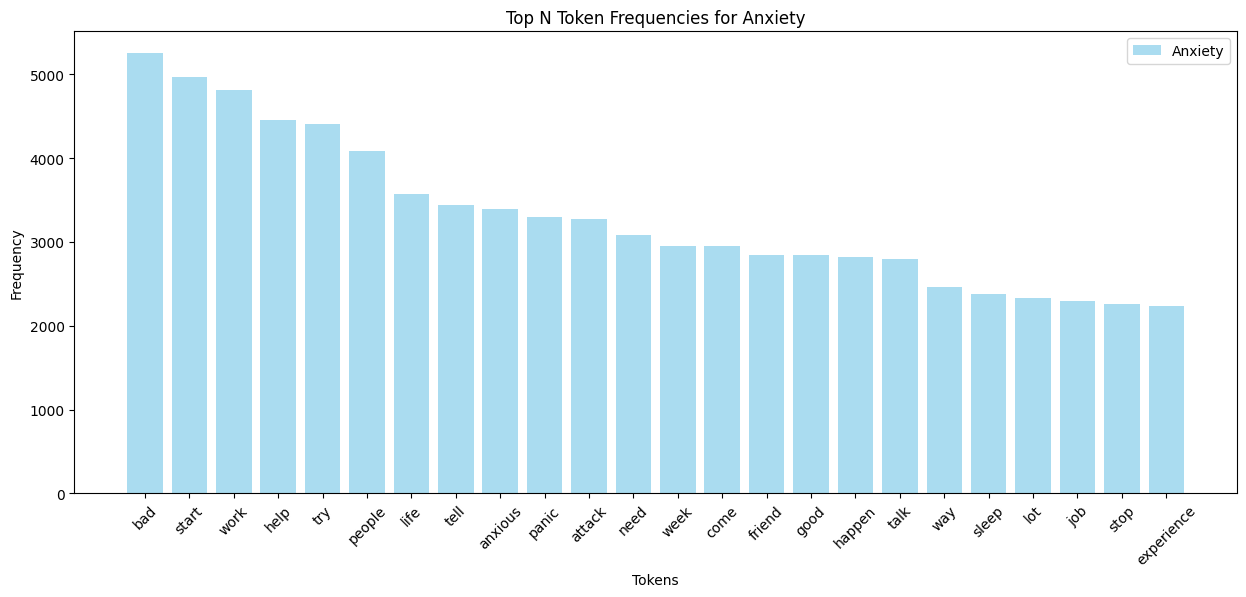

In [ ]:
# Список исключаемых слов
exclude_words = ['feel', 'like', 'know', 'think', 'want', 'day', 'time', 'year', 'thing', 'month', 'anxiety']

# Функция для подсчета частоты слов
def count_word_frequencies(text_list):
    all_words = ' '.join(text_list).split()
    return Counter(all_words)

# Подсчет частоты слов для каждой категории сабреддитов
word_counts_by_subreddit = normalized_data.groupby('subreddit')['selftext_clean_tokens'].apply(lambda x: count_word_frequencies(x))

# Преобразование результатов в DataFrame
word_counts_df = word_counts_by_subreddit.apply(pd.Series).fillna(0).stack().reset_index()
del word_counts_df['level_2']
word_counts_df.columns = ['subreddit', 'selftext_clean_tokens', 'frequency']

# Функция для фильтрации слов из exclude_words
def filter_exclude_words(df, exclude_list):
    return df[~df['selftext_clean_tokens'].isin(exclude_list)]

# Фильтрация топ-7 слов для каждого сабреддита
top_n_by_subreddit = word_counts_df.groupby('subreddit').apply(lambda x: x.nlargest(35, 'frequency')).reset_index(drop=True)
filtered_top_n_by_subreddit = top_n_by_subreddit.groupby('subreddit').apply(lambda x: filter_exclude_words(x, exclude_words)).reset_index(drop=True)

# Визуализация данных
fig, ax = plt.subplots(figsize=(15, 6))

# Данные для Anxiety
anxiety_data = filtered_top_n_by_subreddit[filtered_top_n_by_subreddit['subreddit'] == 'Anxiety']
ax.bar(anxiety_data['selftext_clean_tokens'], anxiety_data['frequency'], label='Anxiety', alpha=0.7, color='skyblue')

# Добавление подписей и заголовка
ax.set_xlabel('Tokens')
ax.set_ylabel('Frequency')
ax.set_title('Top N Token Frequencies for Anxiety')
ax.legend()

plt.xticks(rotation=45)
plt.show()

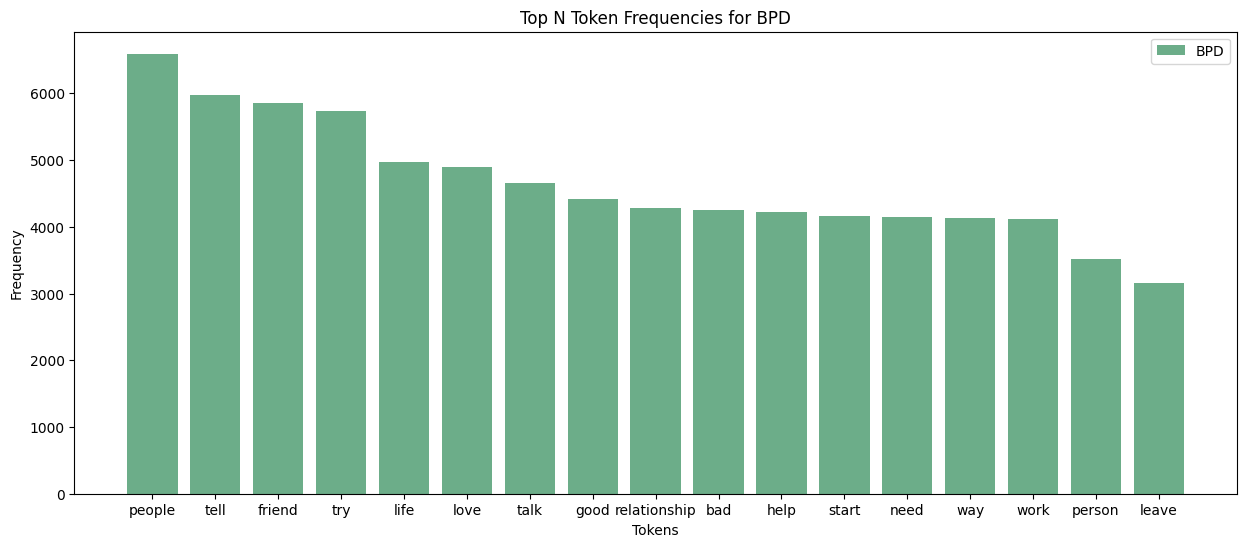

In [ ]:
exclude_words = ['feel', 'like', 'know', 'think', 'want', 'day', 'time', 'year', 'thing', 'month', 'bpd']

word_counts_df.columns = ['subreddit', 'selftext_clean_tokens', 'frequency']

# Функция для фильтрации слов из exclude_words
def filter_exclude_words(df, exclude_list):
    return df[~df['selftext_clean_tokens'].isin(exclude_list)]

# Фильтрация топ-n слов для каждого сабреддита
top_n_by_subreddit = word_counts_df.groupby('subreddit').apply(lambda x: x.nlargest(27, 'frequency')).reset_index(drop=True)
filtered_top_n_by_subreddit = top_n_by_subreddit.groupby('subreddit').apply(lambda x: filter_exclude_words(x, exclude_words)).reset_index(drop=True)

# Визуализация данных
fig, ax = plt.subplots(figsize=(15, 6))

# Данные для BPD
anxiety_data = filtered_top_n_by_subreddit[filtered_top_n_by_subreddit['subreddit'] == 'BPD']
ax.bar(anxiety_data['selftext_clean_tokens'], anxiety_data['frequency'], label='BPD', alpha=0.7, color='seagreen')

# Добавление подписей и заголовка
ax.set_xlabel('Tokens')
ax.set_ylabel('Frequency')
ax.set_title('Top N Token Frequencies for BPD')
ax.legend()

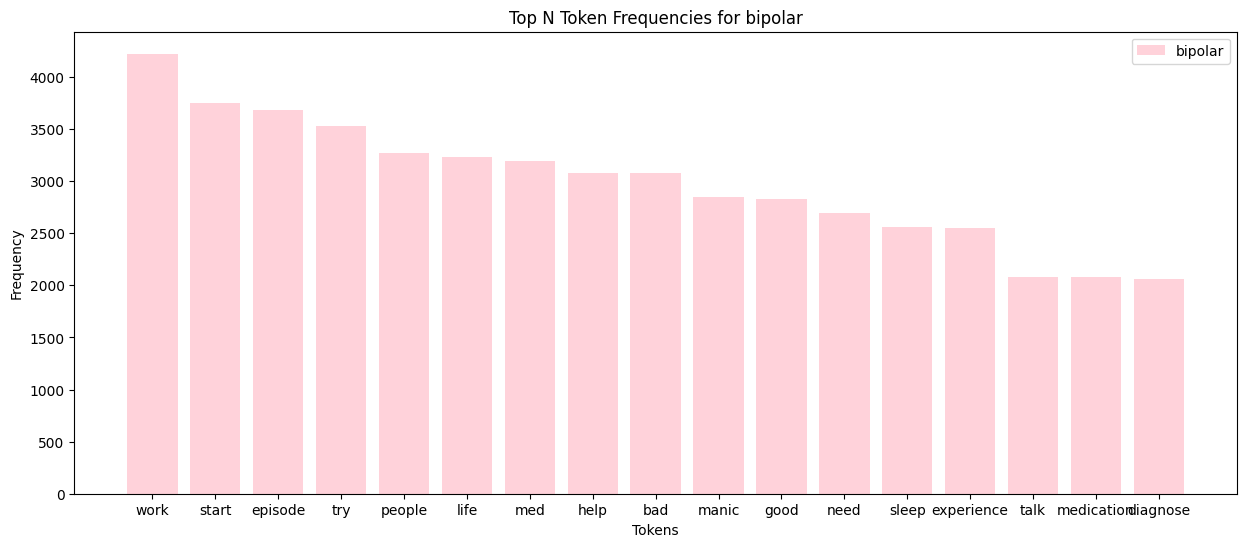

In [ ]:
exclude_words = ['feel', 'like', 'know', 'think', 'want', 'day', 'time', 'year', 'thing', 'month', 'bipolar', 'week', 'tell']

word_counts_df.columns = ['subreddit', 'selftext_clean_tokens', 'frequency']

# Функция для фильтрации слов из exclude_words
def filter_exclude_words(df, exclude_list):
    return df[~df['selftext_clean_tokens'].isin(exclude_list)]

# Фильтрация топ-n слов для каждого сабреддита
top_n_by_subreddit = word_counts_df.groupby('subreddit').apply(lambda x: x.nlargest(30, 'frequency')).reset_index(drop=True)
filtered_top_n_by_subreddit = top_n_by_subreddit.groupby('subreddit').apply(lambda x: filter_exclude_words(x, exclude_words)).reset_index(drop=True)

# Визуализация данных
fig, ax = plt.subplots(figsize=(15, 6))

# Данные для bipolar
anxiety_data = filtered_top_n_by_subreddit[filtered_top_n_by_subreddit['subreddit'] == 'bipolar']
ax.bar(anxiety_data['selftext_clean_tokens'], anxiety_data['frequency'], label='bipolar', alpha=0.7, color='pink')

# Добавление подписей и заголовка
ax.set_xlabel('Tokens')
ax.set_ylabel('Frequency')
ax.set_title('Top N Token Frequencies for bipolar')
ax.legend()

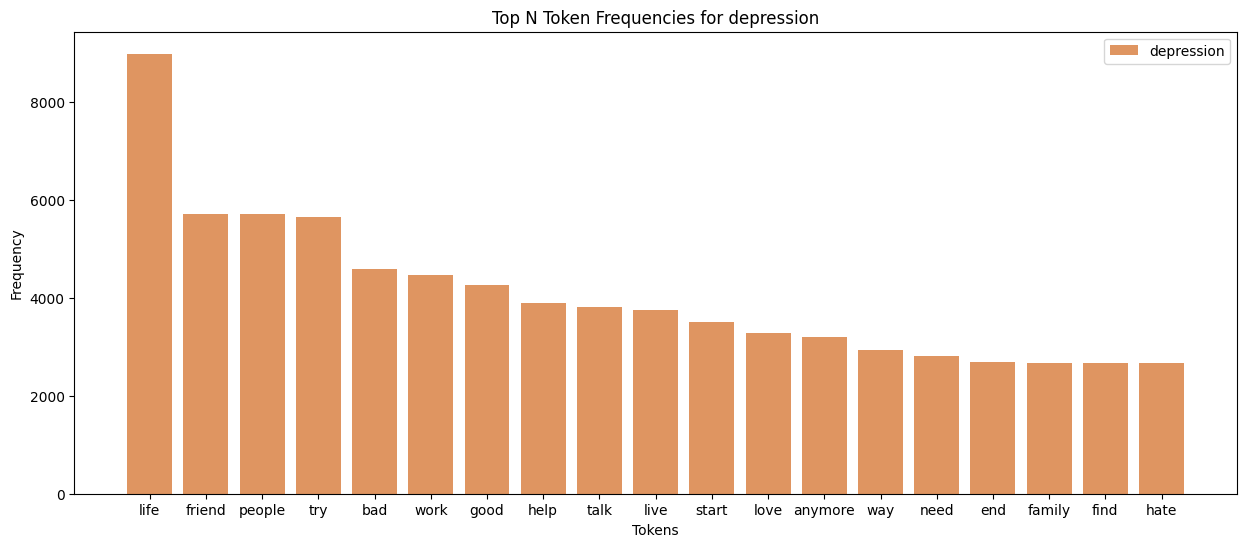

In [ ]:
exclude_words = ['feel', 'like', 'know', 'think', 'want', 'day', 'time', 'year', 'thing', 'month', 'depression', 'week', 'tell']

word_counts_df.columns = ['subreddit', 'selftext_clean_tokens', 'frequency']

# Функция для фильтрации слов из exclude_words
def filter_exclude_words(df, exclude_list):
    return df[~df['selftext_clean_tokens'].isin(exclude_list)]

# Фильтрация топ-n слов для каждого сабреддита
top_n_by_subreddit = word_counts_df.groupby('subreddit').apply(lambda x: x.nlargest(30, 'frequency')).reset_index(drop=True)
filtered_top_n_by_subreddit = top_n_by_subreddit.groupby('subreddit').apply(lambda x: filter_exclude_words(x, exclude_words)).reset_index(drop=True)

# Визуализация данных
fig, ax = plt.subplots(figsize=(15, 6))

# Данные для bipolar
anxiety_data = filtered_top_n_by_subreddit[filtered_top_n_by_subreddit['subreddit'] == 'depression']
ax.bar(anxiety_data['selftext_clean_tokens'], anxiety_data['frequency'], label='depression', alpha=0.7, color='chocolate')

# Добавление подписей и заголовка
ax.set_xlabel('Tokens')
ax.set_ylabel('Frequency')
ax.set_title('Top N Token Frequencies for depression')
ax.legend()

# Preparing data for training

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [76]:
texts = normalized_datas['selftext_clean'].values
labels = normalized_datas['subreddit'].values

In [77]:
# Преобразование меток в числовой формат
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [78]:
# избавиться от значений np.nan в вашем списке текстов перед использованием метода fit_transform:

texts = [text for text in texts if text is not np.nan]
X = vectorizer.fit_transform(texts)

In [79]:
# Преобразование текстов в TF-IDF векторы
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(texts)

In [83]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, labels_encoded[:X.shape[0]], test_size=0.2, random_state=42)

# Model Training

In [84]:
# Создание модели логистической регрессии
model = LogisticRegression(max_iter=1000, multi_class='ovr')

In [85]:
# Обучение модели
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [86]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

In [87]:
# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.7390778794681402


In [88]:
# Вывод отчета классификации
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

               precision    recall  f1-score   support

      Anxiety       0.79      0.78      0.79      2343
          BPD       0.74      0.72      0.73      2305
      bipolar       0.76      0.68      0.72      2287
   depression       0.66      0.74      0.70      2262
schizophrenia       0.75      0.76      0.76      2385

     accuracy                           0.74     11582
    macro avg       0.74      0.74      0.74     11582
 weighted avg       0.74      0.74      0.74     11582



In [93]:
import seaborn as sns
import plotly.express as px
from spacy.lang.ru.stop_words import STOP_WORDS
from gensim.models import Word2Vec
from google.colab import files

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import time

In [94]:
models = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42, probability=True),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

In [95]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    return f1, report, training_time

In [97]:
# Оценка моделей с TF-IDF
print("Оценка моделей с TF-IDF:")
for model_name, model in models.items():
    f1_tfidf, report_tfidf, training_time_tfidf = evaluate_model(model,X_train, X_test, y_train, y_test)
    print(f"F1 score with TF-IDF ({model_name}): {f1_tfidf}")
    print(f"Training time with TF-IDF ({model_name}): {training_time_tfidf:.2f} seconds")
    print(f"Classification report with TF-IDF ({model_name}):\n{report_tfidf}")

Оценка моделей с TF-IDF:
F1 score with TF-IDF (LogisticRegression): 0.7380976015411487
Training time with TF-IDF (LogisticRegression): 34.60 seconds
Classification report with TF-IDF (LogisticRegression):
               precision    recall  f1-score   support

      Anxiety       0.80      0.77      0.79      2343
          BPD       0.73      0.72      0.73      2305
      bipolar       0.75      0.69      0.72      2287
   depression       0.67      0.74      0.70      2262
schizophrenia       0.75      0.76      0.76      2385

     accuracy                           0.74     11582
    macro avg       0.74      0.74      0.74     11582
 weighted avg       0.74      0.74      0.74     11582

F1 score with TF-IDF (RandomForest): 0.7113414735432487
Training time with TF-IDF (RandomForest): 222.90 seconds
Classification report with TF-IDF (RandomForest):
               precision    recall  f1-score   support

      Anxiety       0.77      0.77      0.77      2343
          BPD       0.7

# Conclusions

**Сравнение моделей**

1. Точность и F1-score:

**Logistic Regression:** Показала наилучший F1-score (0.738) и точность (0.74), что делает ее самой эффективной моделью среди всех рассмотренных.

**SVC:** Показала второй лучший F1-score (0.733) и точность (0.73), но время обучения было значительно дольше.

**XGBoost:** Тоже показала хорошие результаты с F1-score (0.726) и точностью (0.73), но была медленнее, чем Logistic Regression.

**Random Forest:** Показала наименьший F1-score (0.711) и точность (0.71), но была быстрее, чем SVC.

2. Время обучения:

**Logistic Regression:** Наиболее быстрая модель с временем обучения 34.60 секунд.

**Random Forest:** Заняла 222.90 секунд на обучение, что значительно больше, чем у Logistic Regression, но меньше, чем у SVC и XGBoost.

**XGBoost:** Время обучения 340.77 секунд, что больше, чем у Logistic Regression и Random Forest.

**SVC:** Наиболее медленная модель с временем обучения 8800.66 секунд, что делает ее непрактичной для больших наборов данных.

3. Производительность по классам:

**Anxiety:** Logistic Regression и SVC показали лучшие результаты с F1-score 0.79 и 0.78 соответственно.

**BPD:** Logistic Regression показала наилучшие результаты (F1-score 0.73), SVC и XGBoost показали F1-score 0.72.

**Bipolar:** Logistic Regression и XGBoost показали лучшие результаты (F1-score 0.72).

**Depression:** Logistic Regression показала лучший результат (F1-score 0.70).

**Schizophrenia:** Logistic Regression показала лучший результат (F1-score 0.76).

**Вывод:**

Таким образом, для данной задачи наиболее подходящей моделью является Logistic Regression из-за ее баланса между качеством предсказаний и временем обучения.